In [ ]:
# Importing FER(2013) Dataset
! unzip /content/FER_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.initializers import  RandomNormal
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
%matplotlib inline


In [ ]:
# Paths for train and test sets
train_dir = "/content/train" #passing the path with training images
test_dir = "/content/test"   #passing the path with testing images

In [ ]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,

                                                    batch_size = 64,
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,

                                                              batch_size = 64,
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 28709 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


**Exploratory Data Analysis** (print some samples of images using python, image size
plots, extract image
features, etc)

In [ ]:
from google.colab.patches import cv2_imshow
from skimage import io

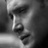

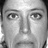

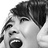

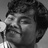

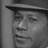

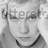

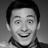

In [ ]:

img_path = "/content/test/angry/PrivateTest_1054527.jpg"
image = io.imread(img_path)
cv2_imshow(image)
img_path1 = "/content/test/disgust/PrivateTest_11895083.jpg"
image1 = io.imread(img_path1)
cv2_imshow(image1)
img_path2 = "/content/test/fear/PrivateTest_10153550.jpg"
image2 = io.imread(img_path2)
cv2_imshow(image2)
img_path3 = "/content/test/happy/PrivateTest_10470092.jpg"
image3 = io.imread(img_path3)
cv2_imshow(image3)
img_path4 = "/content/test/neutral/PrivateTest_11123843.jpg"
image4 = io.imread(img_path4)
cv2_imshow(image4)
img_path5 = "/content/test/sad/PrivateTest_10814167.jpg"
image5 = io.imread(img_path5)
cv2_imshow(image5)
img_path6 = "/content/test/surprise/PrivateTest_10712253.jpg"
image6 = io.imread(img_path6)
cv2_imshow(image6)

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image
print(image.shape[0])
# Check the width of image
print(image.shape[1])


uint8
48
48


Text(0.5, 1.0, 'Distribution of Images per Emotion')

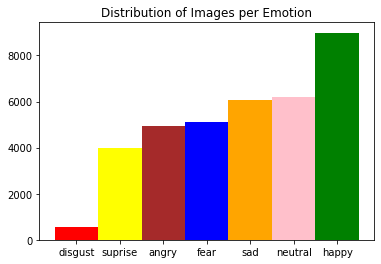

In [ ]:
files = {'angry':958+3995,'disgust':111+436,'fear':1024+4097,'happy':1774+7215,'neutral':1233+4965,'sad':1247+4830,'suprise':831+3171}
c=['red', 'yellow', 'brown', 'blue', 'orange','pink','green']
inversed_files = {n:name for name,n in files.items()}
plt.bar([inversed_files[i] for i in sorted(files.values())], sorted(files.values()), 1,align='center',color =c)
plt.title("Distribution of Images per Emotion")

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range =0.2,
    horizontal_flip=True,
    rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory="/content/train",
                                               target_size=(224,224),
                                               batch_size =32,
                                               )
train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
id = 6
image = np.reshape(np.array(image[id].split(' ')).astype(int),(48,48))
plt.imshow(image)
print(emotion[id])

**Pixel Extraction**

In [ ]:
# Importing FER(2013) Dataset
! unzip /content/fer2013.csv.zip

Archive:  /content/fer2013.csv.zip
  inflating: fer2013.csv             


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle #creating a hidden directory
! cp kaggle.json ~/.kaggle/ #pasting the kaggle api token to above dir
! chmod 600 ~/.kaggle/kaggle.json ## chaging the mode for the file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D,MaxPool2D,ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import vgg16
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#for model deployement
import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import img_to_array

In [ ]:
df = pd.read_csv('./fer2013.csv') #read dataset

df.head(5),df.shape  #first five rows and count of rows and columns

(   emotion                                             pixels     Usage
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training,
 (35887, 3))

In [ ]:
print("Null values present in the file:",df.isna().sum().sum())
print("Basic information about the dataframe:")
df.info()

df.describe()

Null values present in the file: 0
Basic information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
emotions = { #list of available emotions in the dataset
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Sad",
    5:"Surprize",
    6:"Neutral"
}

In [ ]:
count_emotions = (df.groupby(df['emotion'])['pixels'].count()).to_frame()
count_emotions['emotion name'] = [emotions[k] for k in emotions.keys()]
count_emotions

,pixels,emotion name
emotion,,
0,4953,Angry
1,547,Disgust
2,5121,Fear
3,8989,Happy
4,6077,Sad
5,4002,Surprize
6,6198,Neutral


In [ ]:
count_usage = (df.groupby(df['Usage'])['pixels'].count()).to_frame()
count_usage

,pixels
Usage,
PrivateTest,3589
PublicTest,3589
Training,28709


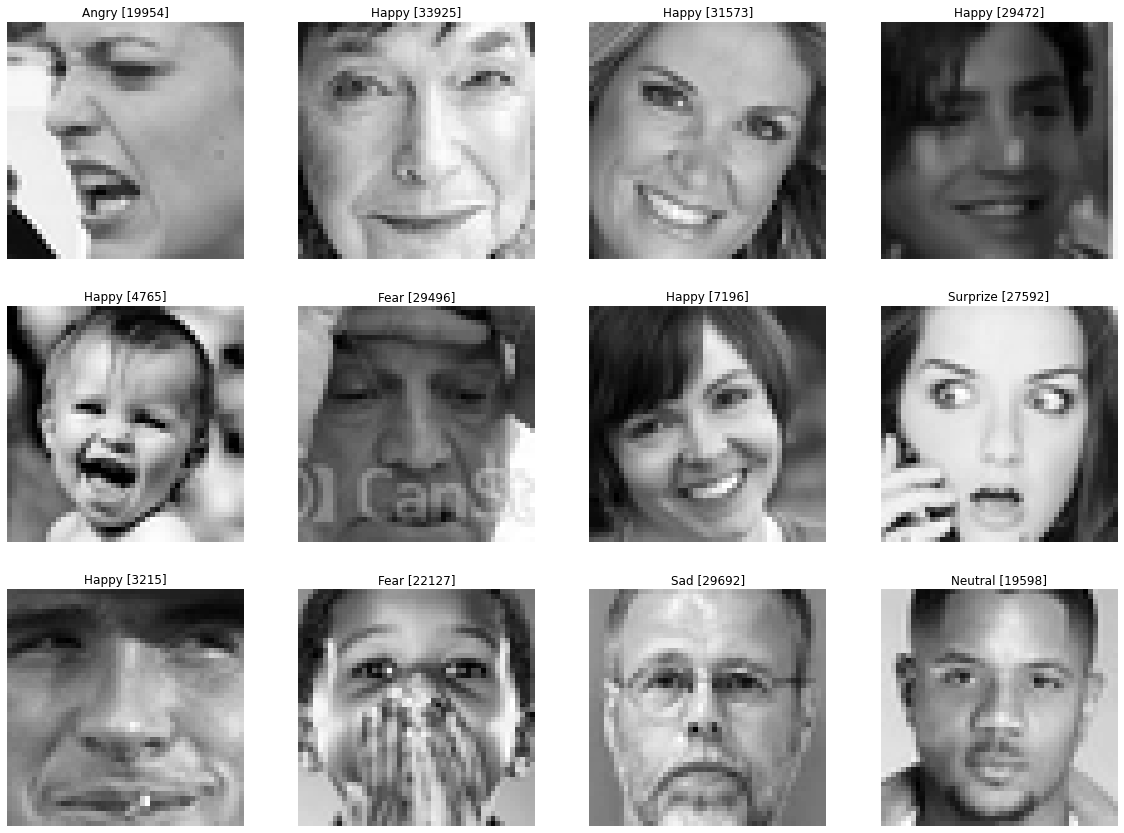

In [ ]:
# from PIL import Image
# pixels = df['pixels'][0]
# b = bytes(int(p) for p in pixels.split())
# i = Image.frombuffer('L',(48,48),b)
# di.save('a.png')
def visualize_images(n_img=4):
    indices = np.random.randint(0,df.shape[0],size=n_img)
#     print(indices)
    plt.figure(figsize=(20,20))
    for i,l in zip(indices,range(0,len(indices))):
        image_ar = np.array([i for i in  df['pixels'][i].split()] , dtype='float')
        pixels = np.reshape(image_ar,(48,48))
        ax = plt.subplot(4,4,l+1)
        plt.imshow(pixels,cmap='gray')
        plt.title(emotions[df['emotion'][i]]+" ["+str(i)+"]")
        plt.xticks()
        plt.yticks([])
        plt.axis("off")
visualize_images(12)

**ML Algorithms**

Notebook links:

[Decision Tree ,Logistic Regression  and KNN Notebook](https://colab.research.google.com/drive/1nVL9CfOKhlBfv0QL_xe_4mybV_0YqckT?usp=sharing)

[Feature Extraction Notebook](https://colab.research.google.com/drive/1f2msPV3wNvKqhtwtrIksh0keYEcqWjR6?usp=sharing)

[SVM and Naive Bayes Notebook](https://colab.research.google.com/drive/1pxU6yIQAh4akSWgJw3kpJaZoxk7Lcar6?usp=sharing)

**DL Algorithms**

Notebook links:

[CNN Notebook](https://colab.research.google.com/drive/1Swt6o_bRS0Rf2j61gzO__g2ChbHLvki4#scrollTo=abECAHq0pMs4)